# Load the functions

In [1]:
library(ComplexHeatmap)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(circlize)
library(NMF)
library("gplots")

Loading required package: grid

ComplexHeatmap version 2.13.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package

In [2]:
to_plot <- read.csv('/home/jovyan/scripts/renal_covid_19/sig_gene_plot/gene_score_to_plot_allmono_bothwave_pos.csv',row.names = 1)

In [3]:
head(to_plot)

,CD14mono,CD14mono_IFN,CD14mono_alt_act,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
upLPS,-1.2081330,0.05384968,-1.0617146,0.6025635,0.67534618,1.506131,-0.5680424
sLPS,-0.4635026,0.71211078,-1.3394129,0.4359371,-0.08005483,1.595779,-0.8608570
sLPS_IFNg,-0.9892550,0.07383850,-1.3794471,0.2470734,0.70072567,1.582844,-0.2357793
IFNg,-1.1212026,0.44761216,-1.1789375,-0.3664610,0.82449132,1.523766,-0.1292688
IFNg_TNF,-0.9969437,0.76601176,-0.9996725,-0.7070260,0.77343390,1.488802,-0.3246049
TNF,-1.0502465,1.29336454,-0.4525567,-0.7935499,0.43072500,1.296180,-0.7239163


In [4]:
to_plot <- as.matrix(to_plot)
head(to_plot)

,CD14mono,CD14mono_IFN,CD14mono_alt_act,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono
upLPS,-1.2081330,0.05384968,-1.0617146,0.6025635,0.67534618,1.506131,-0.5680424
sLPS,-0.4635026,0.71211078,-1.3394129,0.4359371,-0.08005483,1.595779,-0.8608570
sLPS_IFNg,-0.9892550,0.07383850,-1.3794471,0.2470734,0.70072567,1.582844,-0.2357793
IFNg,-1.1212026,0.44761216,-1.1789375,-0.3664610,0.82449132,1.523766,-0.1292688
IFNg_TNF,-0.9969437,0.76601176,-0.9996725,-0.7070260,0.77343390,1.488802,-0.3246049
TNF,-1.0502465,1.29336454,-0.4525567,-0.7935499,0.43072500,1.296180,-0.7239163


In [5]:
grouping <- read.csv('/home/jovyan/scripts/stat3/downstream_analysis/gene_scores/cytokine_grouping1.csv',row.names="X")

In [6]:
head(grouping,n=10)

,group,cell_type
,<chr>,<chr>
upLPS,INFG_stimulated,M1
sLPS,INFG_stimulated,M1
sLPS_IFNg,INFG_stimulated,M1
IFNg,INFG_stimulated,M1
IFNg_TNF,INFG_stimulated,M1
TNF,INFG_stimulated,M1
IL13,IL4_stimulated,M2
IL4,IL4_stimulated,M2
IL4_upLPS,IL4_stimulated,M2


In [7]:
ann_colors = list(
    cell_type =c(M1 ='blue',M2 ='#056608',mixed = 'black',other = 'red'),
  group = c( INFG_stimulated="blue",IL4_stimulated="#056608",mixed ='black',other ='red'))
ann_colors

$cell_type
       M1        M2     mixed     other 
   "blue" "#056608"   "black"     "red" 

$group
INFG_stimulated  IL4_stimulated           mixed           other 
         "blue"       "#056608"         "black"           "red"

In [8]:
save_pheatmap_pdf <- function(x, filename, width=9, height=12) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [9]:
dim(to_plot)

[1] 28  7

In [10]:
dim(grouping)

[1] 28  2


Attaching package: ‘pheatmap’


The following object is masked from ‘package:ComplexHeatmap’:

    pheatmap


Loading required package: viridisLite



png 
  2

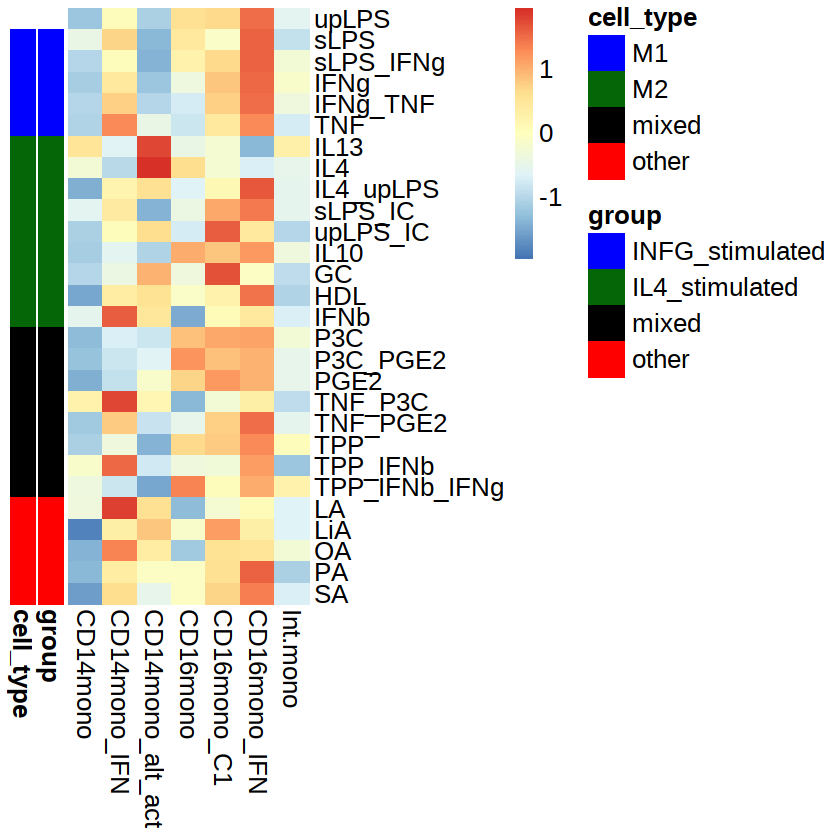

In [11]:
library(pheatmap)
library(ggplot2)
library(cowplot)
library(viridis)
p<-pheatmap(to_plot,scale = 'row' ,fontsize = 15, show_rownames=T,cluster_row =F,cluster_col=F,show_colnames=T,annotation_row=grouping, annotation_colors = ann_colors,border_color=NA)
save_pheatmap_pdf(p,'/home/jovyan/scripts/renal_covid_19/sig_gene_plot/allmono_wave2_pos_steroid.pdf')